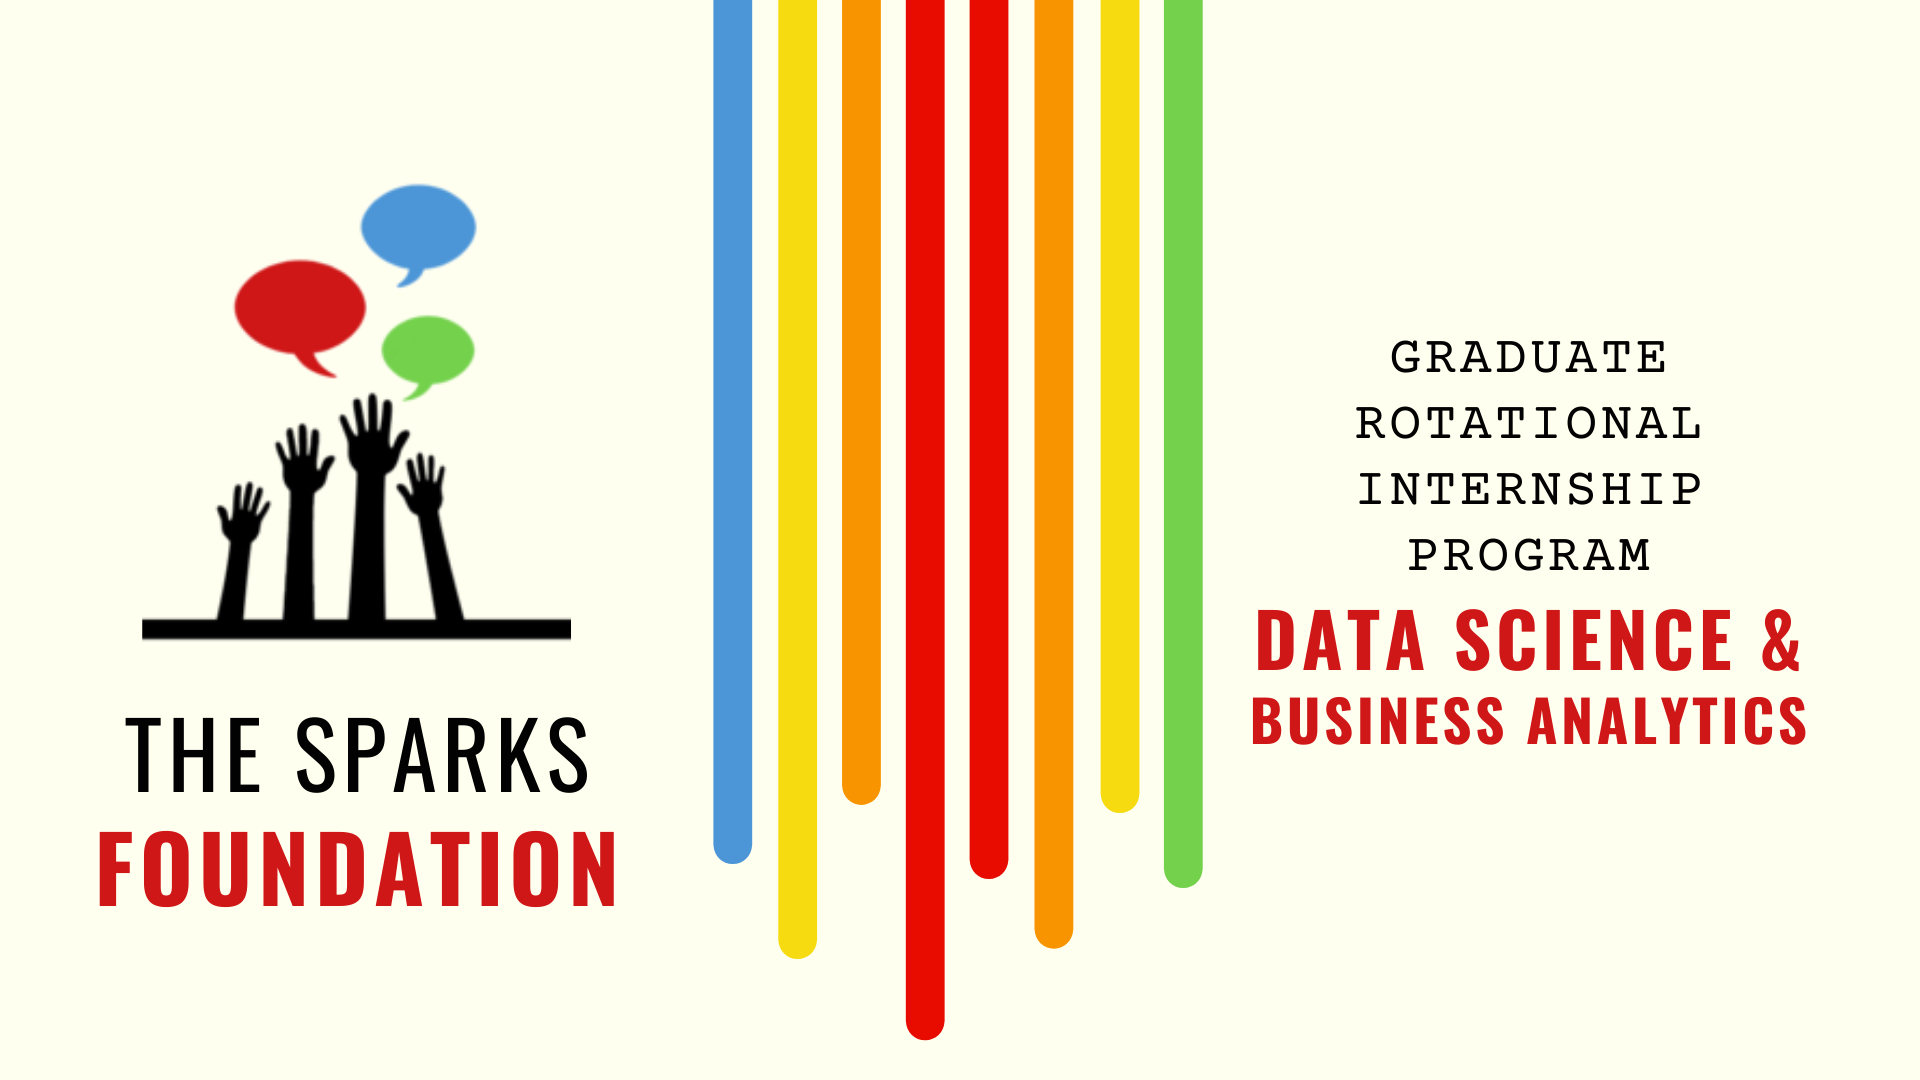

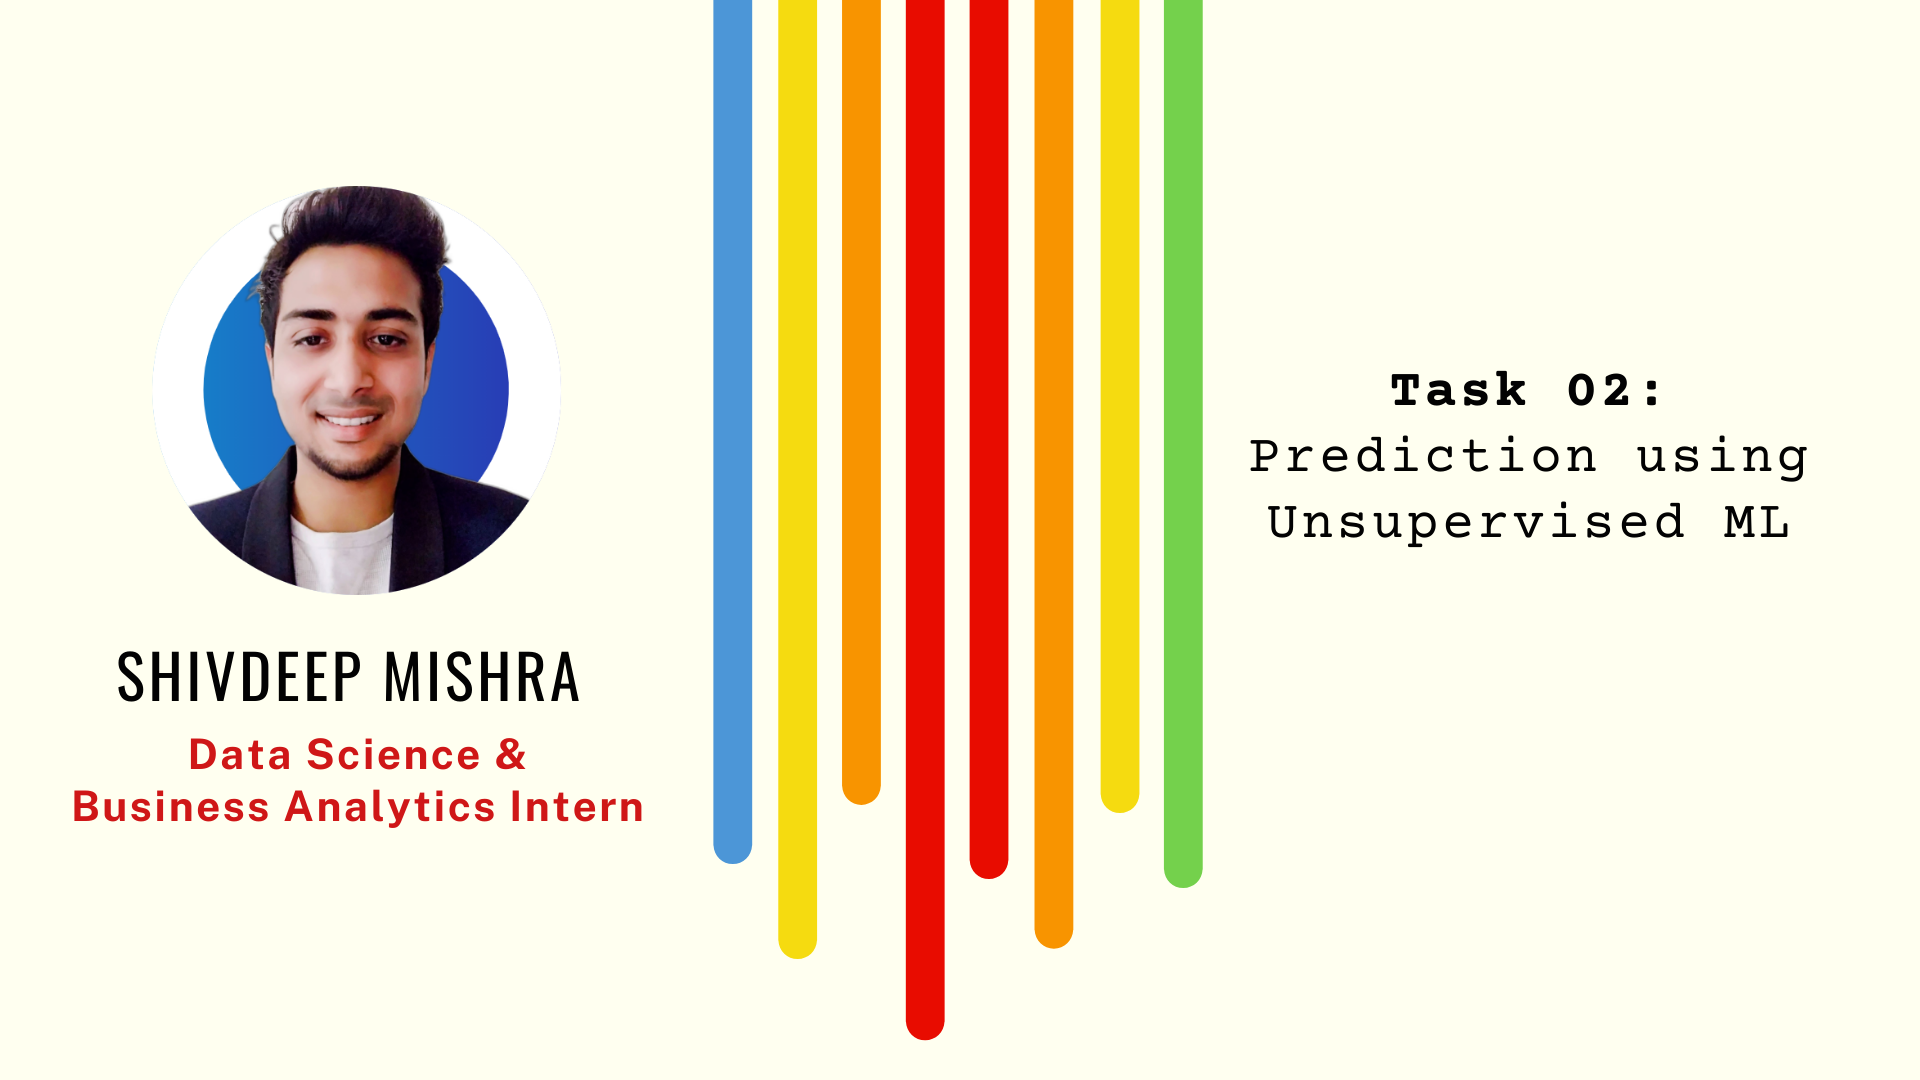

## Task 

● Prediction using Unsupervised ML.

● From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

### Importing libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

### Loading Iris data

In [7]:
# loading built-in iris data
iris_data = datasets.load_iris()

In [144]:
# data
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Input DataFrame

In [10]:
# input data
input_data = pd.DataFrame(data = iris_data.data, columns = iris_data.feature_names)

### Exploring the data

In [12]:
# top five rows
input_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
# columns and rows of input data
input_data.shape

(150, 4)

In [147]:
# checking datatypes and null values
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [146]:
# summarizing the inputdata
input_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


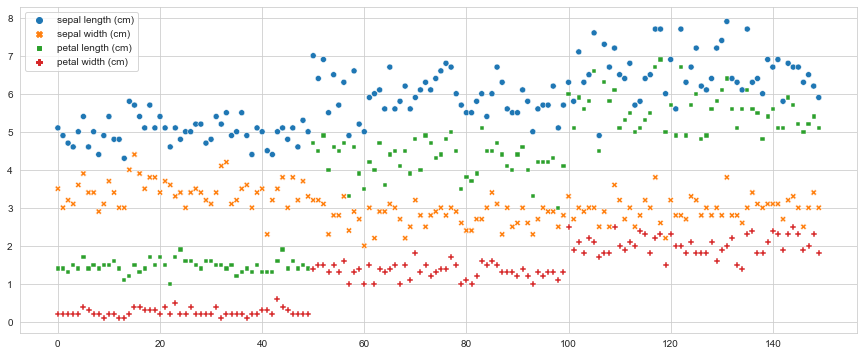

In [145]:
# plotting the distribution of input data

plt.figure(figsize=(15, 6))

sns.scatterplot(data = input_data)

plt.show()

### Checking the optimum number of clusters: Elbow Method

    - Let's make a list of inertia for custers from 1 to 9

In [140]:
n_clus = list(range(1, 10))

inertia_list = []

for i in n_clus:
    
    model_i = KMeans(n_clusters = i)
    model_i.fit(input_data)
    
    inertia_list.append(model_i.inertia_)
    
print(n_clus)

print("\n",inertia_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

 [681.3705999999996, 152.34795176035797, 78.851441426146, 57.25600931571815, 46.44618205128204, 39.03998724608725, 34.299712121212146, 30.430362507058163, 28.103610955865612]


    We got our list of inertia, let's plot the Elbow graph

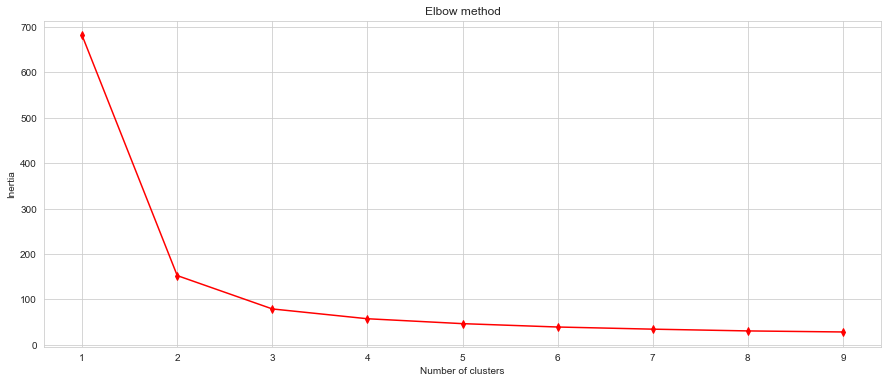

In [141]:
# Elbow method
plt.figure(figsize=(15, 6))

plt.plot(n_clus, inertia_list, marker = 'd', markersize = 5, c = 'r')

plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

### Checking the optimum number of clusters: Silhouette Score 

    - Let's make a list of Silhouette Score for clusters from 2 to 9

In [153]:
n_clus = list(range(2, 9))

score_list = []

for i in n_clus:
    
    model_i = KMeans(n_clusters = i)
    model_i.fit(input_data)
    
    score_list.append(metrics.silhouette_score(X = input_data, labels = model_i.labels_))
    
print(n_clus)

print("\n",score_list)

[2, 3, 4, 5, 6, 7, 8]

 [0.681046169211746, 0.5528190123564091, 0.4980505049972866, 0.4887488870931048, 0.35935884409244145, 0.3452178646369988, 0.3401193338101638]


In [154]:
# finding maximum Silhouette Score in list
max(score_list)

0.681046169211746

In [155]:
# index of maximum Silhouette Score
n_clus[score_list.index(max(score_list))]

2

    By looking at the  Elbow Method  &  Silhouette Score, we can summarize that optimum number of clusters is 3.

### Applying the KMeans algorithm with the optimum number of clusters that is 3

In [89]:
# Appying kmeans algorithm with optimum no. of clusters

kmeans = KMeans(n_clusters=3)

kmeans.fit(input_data)

KMeans(n_clusters=3)

### Visualizing the clusters with their respective centroid

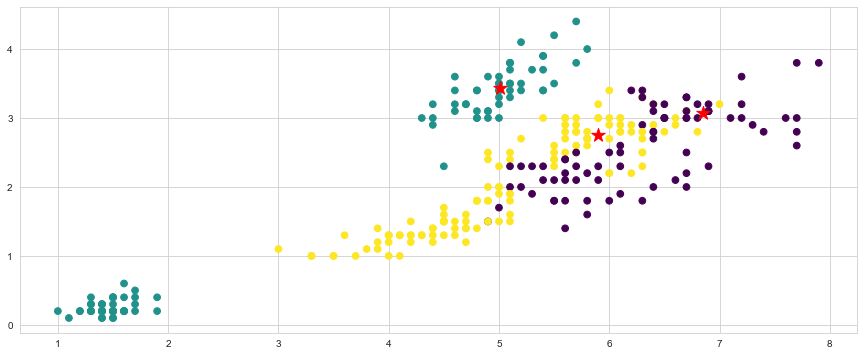

In [133]:
sns.set_style('whitegrid')

plt.figure(figsize=(15, 6))

plt.scatter(x=input_data["sepal length (cm)"], y=input_data["sepal width (cm)"], c = kmeans.labels_, cmap='viridis', s = 45)

plt.scatter(x=input_data["petal length (cm)"], y=input_data["petal width (cm)"], c = kmeans.labels_, cmap='viridis', s = 45)

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c = 'red', cmap='plasma', marker = '*', s= 200)

plt.show()